In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
df = pd.read_csv("csv/book_info_complete.csv")

In [39]:
df = df.dropna(axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 10 columns):
title               5816 non-null object
description         5816 non-null object
plot                5816 non-null object
csm_review          5816 non-null object
need_to_know        5816 non-null object
csm_rating          5816 non-null int64
Genre               5816 non-null object
Book type           5816 non-null object
Publication date    5816 non-null object
Last updated        5816 non-null object
dtypes: int64(1), object(9)
memory usage: 454.5+ KB


## Make the Split

In [40]:
def splitter(df):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=999)
    for train_index, test_index in split.split(df, df['csm_rating']):
        train_data= df.loc[train_index]
        test_data = df.loc[test_index]
    
    return train_data, test_data

train_data, test_data = splitter(df)

In [41]:
mode = int(train_data.loc[:, "csm_rating"].mode())
median = int(train_data.loc[:, "csm_rating"].median())
mean = int(train_data.loc[:, "csm_rating"].mean())

print("The most common rating is %d." % mode)
print("The median is %d." % median)
print("The mean is %d." % mean)

The most common rating is 4.
The median is 9.
The mean is 9.


In [42]:
train_data["csm_mode"] = mode
train_data["csm_median"] = median
train_data["csm_mean"] = mean
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 3662 to 5209
Data columns (total 13 columns):
title               4652 non-null object
description         4652 non-null object
plot                4652 non-null object
csm_review          4652 non-null object
need_to_know        4652 non-null object
csm_rating          4652 non-null int64
Genre               4652 non-null object
Book type           4652 non-null object
Publication date    4652 non-null object
Last updated        4652 non-null object
csm_mode            4652 non-null int64
csm_median          4652 non-null int64
csm_mean            4652 non-null int64
dtypes: int64(4), object(9)
memory usage: 508.8+ KB


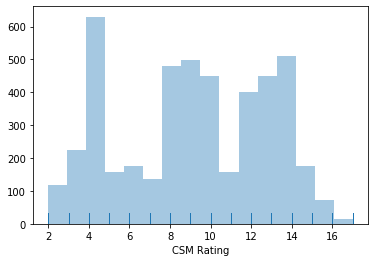

In [50]:
sns_plot = sns.distplot(train_data.loc[:, "csm_rating"], 
             kde=False,
             bins=16,
             rug=True,
             axlabel="CSM Rating")

sns_plot.figure.savefig("reports/target_distribution.png")

In [8]:
y_actual = test_data.loc[:, "csm_rating"]
y_mode = np.full(len(y_actual), mode)
y_median = np.full(len(y_actual), median)
y_mean = np.full(len(y_actual), mean)

In [9]:
rmse_mode = sqrt(mean_squared_error(y_actual, y_mode))
rmse_median = sqrt(mean_squared_error(y_actual, y_median))
rmse_mean = sqrt(mean_squared_error(y_actual, y_mean))

print("The rmse for the mode is %.2f." % rmse_mode)
print("The rmse for the median is %.2f." % rmse_median)
print("The rmse for the mean is %.2f." % rmse_mean)

The rmse for the mode is 6.45.
The rmse for the median is 3.88.
The rmse for the mean is 3.88.


In [10]:
mae_mode = mean_absolute_error(y_actual, y_mode)
mae_median = mean_absolute_error(y_actual, y_median)
mae_mean = mean_absolute_error(y_actual, y_mean)

print("The mae for the mode is %.2f." % mae_mode)
print("The mae for the median is %.2f." % mae_median)
print("The mae for the mean is %.2f." % mae_mean)

The mae for the mode is 5.36.
The mae for the median is 3.27.
The mae for the mean is 3.27.
